In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
dataset = pd.read_csv('matches.csv')
dataset
#dataset = pd.Series[dataset]

    

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
dataset1 = pd.read_csv('deliveries.csv')

In [6]:
dataset1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [7]:
dictOfTeams = {'mi':'Mumbai Indians','csk':'Chennai Super Kings','rcb':'Royal Challengers Bangalore','srh':'Sunrisers Hyderabad','kings11':'Kings XI Punjab','kkr':'Kolkata Knight Riders','rr':'Rajasthan Royals','dc':'Delhi Daredevils'}
dictOfColors = {'mi':'blue','csk':'yellow','rcb':'red','srh':'orangered','kings11':'deeppink','kkr':'mediumblue','rr':'cornflowerblue','dc':'lightsteelblue'}

Enter team name mi
[7, 5, 11, 10, 10, 13, 7, 10, 7, 12, 6] [7, 8, 5, 6, 7, 6, 8, 6, 7, 5, 8] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[50.0, 38.46, 68.75, 62.5, 58.82, 68.42, 46.67, 62.5, 50.0, 70.59, 42.86]


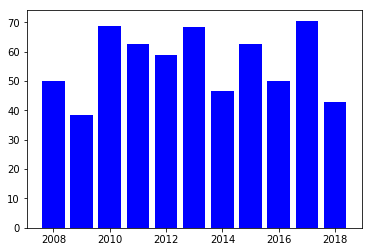

In [24]:
#check a team winning graph
def team_stats(t):
    team = dictOfTeams[t]
    if t in ['csk','rr']:
        wins = [0,0,0,0,0,0,0,0,2,2,0]
        losses,no_result = [0,0,0,0,0,0,0,0,1,1,0],[0,0,0,0,0,0,0,0,0,0,0]
    else:
        wins = [0,0,0,0,0,0,0,0,0,0,0]
        losses,no_result = [0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0]
    for i,j,k,l,m in zip(dataset['team1'],dataset['team2'],dataset['result'],dataset['winner'],dataset['season']):
        val = int(m)-2008
        if team in [i,j]:
            if k != 'no result':
                if l == team:
                    wins[val] += 1
                else:
                    losses[val] += 1
            else:
                no_result[val] += 1
    #print(wins,losses,no_result)
    for i in range(0,len(wins)):
        if (wins[i]==0 and losses[i]==0 and no_result[i]==0):
            wins[i] = -1
    print(wins,losses,no_result)
    win_percentage = [round(((i/(i+j+k))*100),2) for i,j,k in zip(wins,losses,no_result)]
    print(win_percentage)
    if t in ['csk','rr']:
        win_percentage[8:10] = [0,0]
        print(t," not played IPL in 2016 and 2017")
    years = [i for i in range(2008,2019)]
    plt.bar(years,win_percentage,color=dictOfColors[t])
team_name = str(input('Enter team name '))
team_stats(team_name)

Enter team 1 : csk
Enter team 2 : rcb


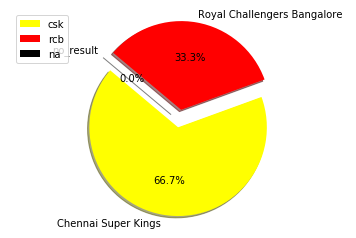

In [9]:
#function to compare two functions
def compare_two_teams(t1,t2):
    global dataset
    team1,team2 = dictOfTeams[t1],dictOfTeams[t2]
    wins1,wins2,no_result,total = 0,0,0,0
    for i,j,k,l in zip(dataset['team1'],dataset['team2'],dataset['winner'],dataset['result']):
        if team1 in [i,j] and team2 in [i,j]:
            if k==team1:
                wins1 += 1
            elif k==team2:
                wins2 += 1
            if l=='no result':
                no_result += 1
            total += 1
    #print(wins1,wins2,no_result,total)
    labels = [team1,team2,'no_result']
    sizes = [wins1,wins2,no_result]
    colors = [dictOfColors[t1],dictOfColors[t2],'black']
    explode = (0.1,0.1,0.1)
    plt.pie(sizes, explode = explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.legend([t1,t2,'na'],loc='upper left')
    plt.axis('equal')
    plt.show()
t1 = str(input('Enter team 1 : '))
t2 = str(input('Enter team 2 : '))
compare_two_teams(t1,t2)

In [10]:
########GET STATS OF A INDIVIDUAL PLAYER#########
#1.select a team
#2.view players list in the selected team
#3.select a player from the list
#4.view stats of selected player
#season id 7894-7953

In [30]:
teamName = str(input('Enter team Name : '))
listOfPlayers = []
for i,j,k in zip(dataset1['batting_team'],dataset1['match_id'],dataset1['batsman']):
    if i == dictOfTeams[teamName] and int(j) in range(7894,7954):
        if k not in listOfPlayers:
            listOfPlayers += [k]
print(listOfPlayers)
        

Enter team Name : rr
['AM Rahane', 'D Short', 'SV Samson', 'BA Stokes', 'RA Tripathi', 'JC Buttler', 'K Gowtham', 'S Gopal', 'DS Kulkarni', 'JD Unadkat', 'B Laughlin', 'H Klaasen', 'STR Binny', 'J Archer', 'M Lomror', 'P Chopra', 'I Sodhi', 'Anureet Singh']


In [26]:
#select a player...Player names are case sensitive
player = str(input('Enter player name : '))
runs,outs,balls_faced = 0,0,0
for i,j,k,l,m,n in zip(dataset1['batsman_runs'],dataset1['match_id'],dataset1['batsman'],dataset1['player_dismissed'],dataset1['wide_runs'],dataset1['is_super_over']):
    if l==player and int(n)==0:
            outs += 1
    if k==player and int(n)==0:
        runs += int(i)
        if int(m)==0:
            balls_faced += 1
print(player,"stats")
print("runs        :",runs)
print("balls faced :",balls_faced)
print("strike rate :",round(((runs/balls_faced)*100),2))
print("average     :",round((runs/outs),2))

Enter player name : AM Rahane
AM Rahane stats
runs        : 3445
balls faced : 2850
strike rate : 120.88
average     : 33.12


In [31]:
#Bowler vs Batsman
batsman = str(input('Enter batsman name : '))
bowler = str(input('Enter bowler name : '))
balls,runs,outs,f = 0,0,0,0
for i,j,k,l,m,n in zip(dataset1['batsman'],dataset1['bowler'],dataset1['batsman_runs'],dataset1['player_dismissed'],dataset1['dismissal_kind'],dataset1['wide_runs']):
    if i == batsman and j == bowler and int(n)==0:
        f = 1
        balls += 1
        runs += int(k)
        if l==batsman and m!='run out':
            outs += 1
if f==0:
    print('They did not face each other')
else:
    print("runs_scored : ",runs)
    print("balls_faced :",balls)
    print("dismissals  :",outs)

Enter batsman name : AM Rahane
Enter bowler name : DJ Bravo
runs_scored :  53
balls_faced : 26
dismissals  : 1
